<a href="https://colab.research.google.com/github/faloabdo/AI4ALL-Project/blob/main/Second_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetes Health Indicators

In [76]:
#imports
import os
import pandas as pd
import numpy as np
import random
random.seed(1)

In [77]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/AI4ALL'


In [79]:
!pip install kaggle

In [80]:
import os
os.chdir('/content/drive/MyDrive/AI4ALL')
!kaggle datasets download alexteboul/diabetes-health-indicators-dataset
os.listdir()

Dataset URL: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
License(s): CC0-1.0
diabetes-health-indicators-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


['diabetes_012_health_indicators_BRFSS2015.csv',
 'diabetes_binary_health_indicators_BRFSS2015.csv',
 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv',
 'diabetes-health-indicators-dataset.zip',
 'kaggle.json']

In [81]:
!unzip diabetes-health-indicators-dataset.zip


Archive:  diabetes-health-indicators-dataset.zip
replace diabetes_012_health_indicators_BRFSS2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace diabetes_binary_5050split_health_indicators_BRFSS2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace diabetes_binary_health_indicators_BRFSS2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# New Section

In [82]:
!ls

diabetes_012_health_indicators_BRFSS2015.csv
diabetes_binary_5050split_health_indicators_BRFSS2015.csv
diabetes_binary_health_indicators_BRFSS2015.csv
diabetes-health-indicators-dataset.zip
kaggle.json


In [83]:
import pandas as pd
df_diabetes = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [84]:
df_diabetes.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [85]:


print(f"Number of rows: {df_diabetes.shape[0]}")
print(f"Number of columns: {df_diabetes.shape[1]}")


Number of rows: 70692
Number of columns: 22


In [86]:
print(df_diabetes.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [87]:
df_diabetes.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [88]:
for col in df_diabetes.columns:
    print(f"\nGroupby for column: {col}")
    print(df_diabetes.groupby([col]).size())


Groupby for column: Diabetes_binary
Diabetes_binary
0.0    35346
1.0    35346
dtype: int64

Groupby for column: HighBP
HighBP
0.0    30860
1.0    39832
dtype: int64

Groupby for column: HighChol
HighChol
0.0    33529
1.0    37163
dtype: int64

Groupby for column: CholCheck
CholCheck
0.0     1749
1.0    68943
dtype: int64

Groupby for column: BMI
BMI
12.0     1
13.0     8
14.0     8
15.0    30
16.0    70
        ..
87.0    13
89.0     4
92.0     9
95.0     4
98.0     4
Length: 80, dtype: int64

Groupby for column: Smoker
Smoker
0.0    37094
1.0    33598
dtype: int64

Groupby for column: Stroke
Stroke
0.0    66297
1.0     4395
dtype: int64

Groupby for column: HeartDiseaseorAttack
HeartDiseaseorAttack
0.0    60243
1.0    10449
dtype: int64

Groupby for column: PhysActivity
PhysActivity
0.0    20993
1.0    49699
dtype: int64

Groupby for column: Fruits
Fruits
0.0    27443
1.0    43249
dtype: int64

Groupby for column: Veggies
Veggies
0.0    14932
1.0    55760
dtype: int64

Groupby for co

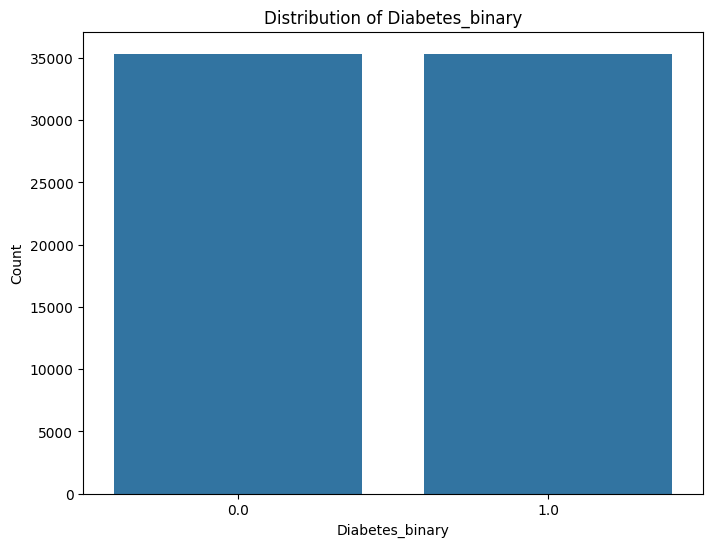

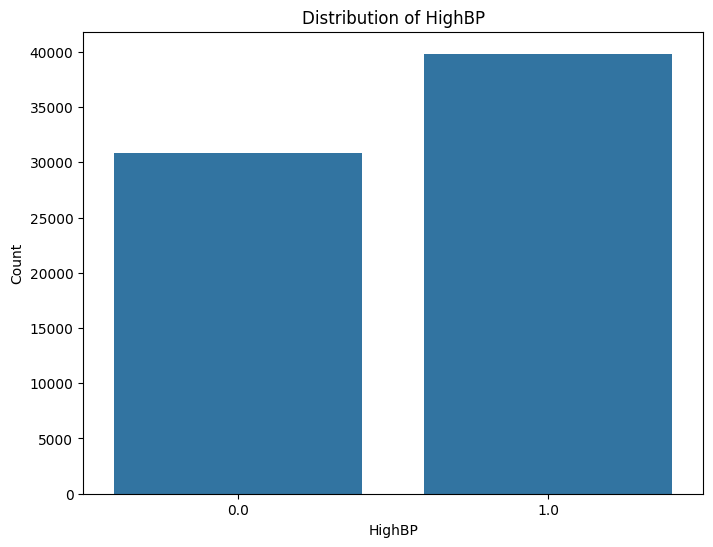

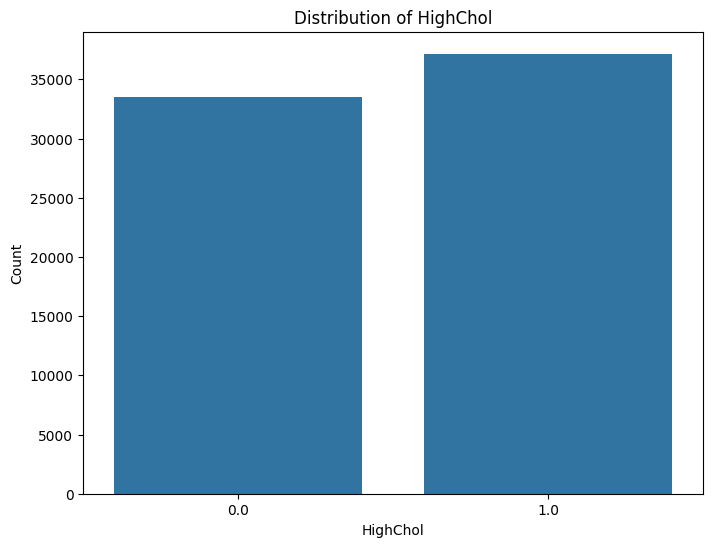

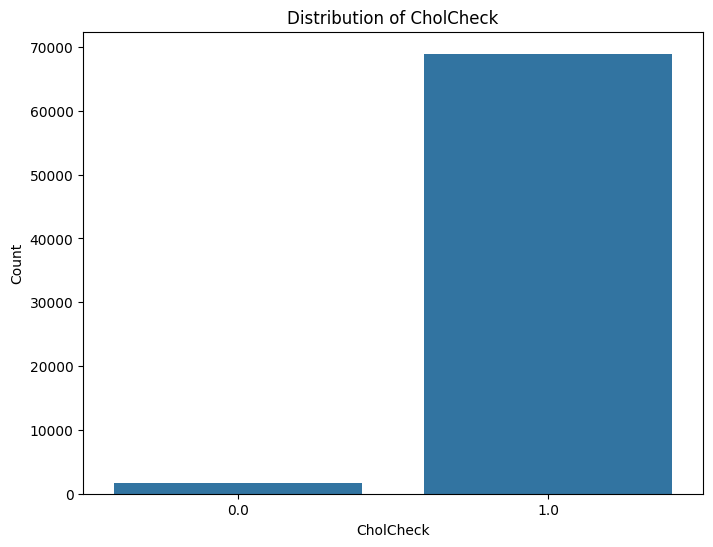

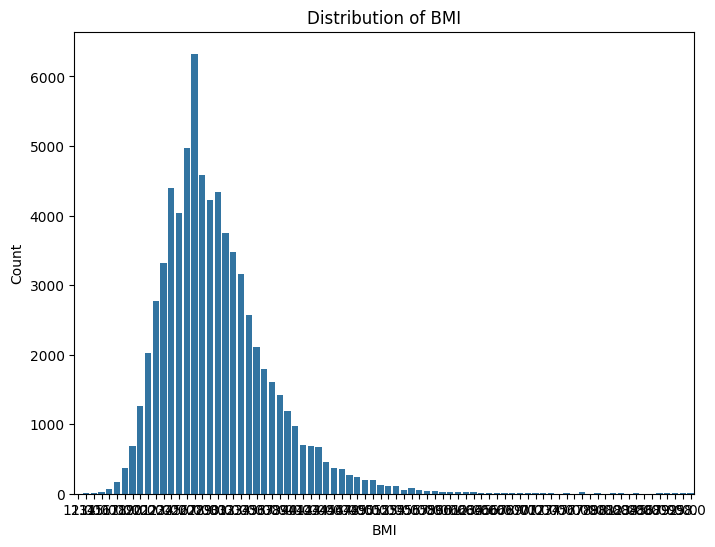

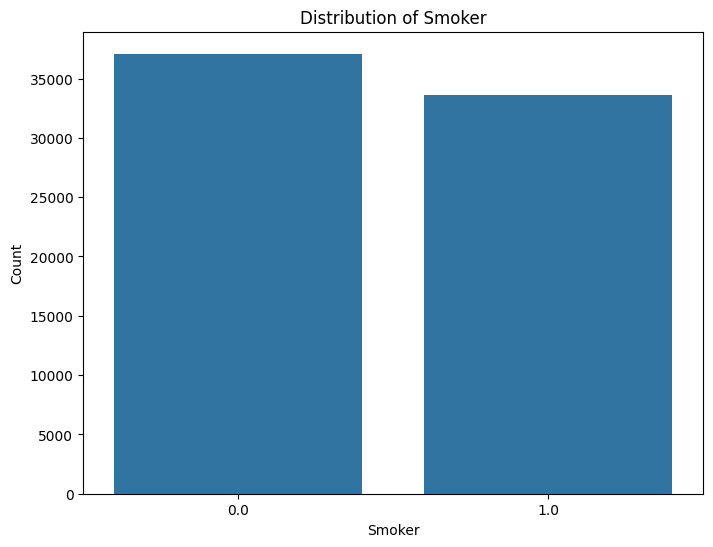

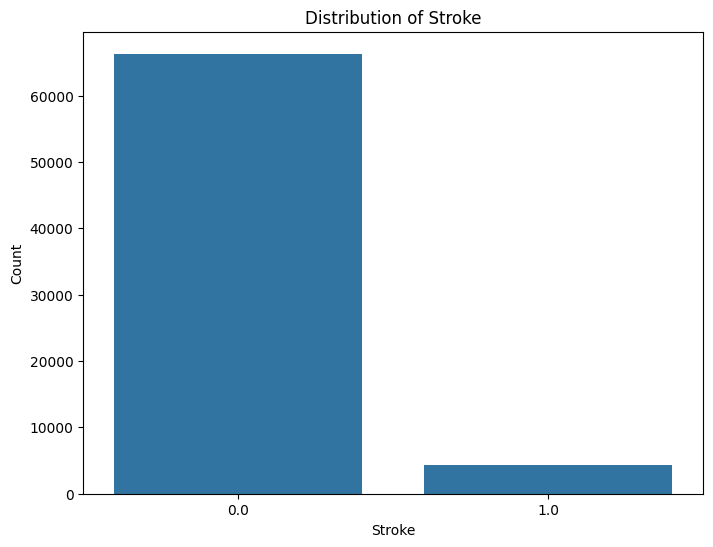

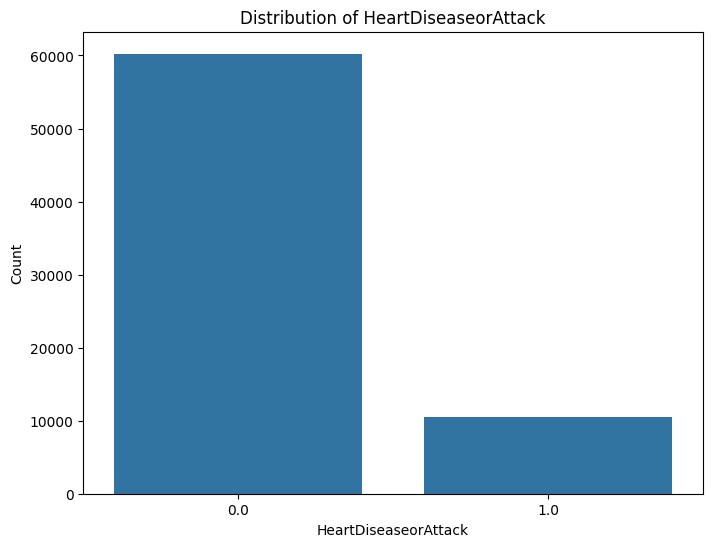

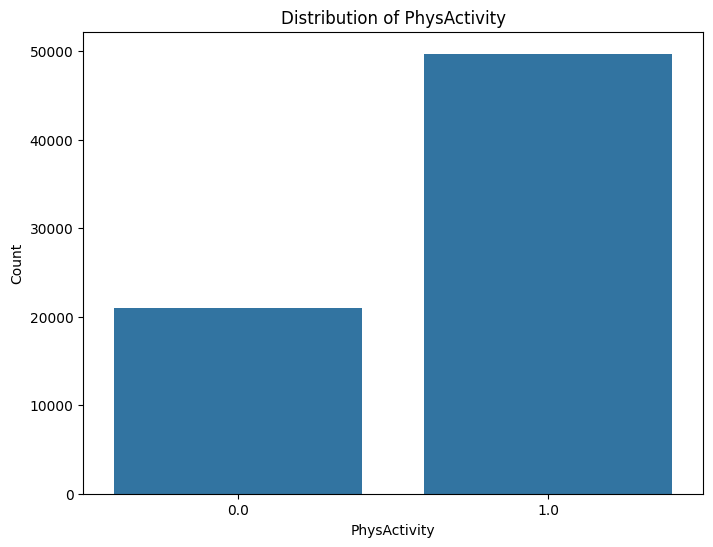

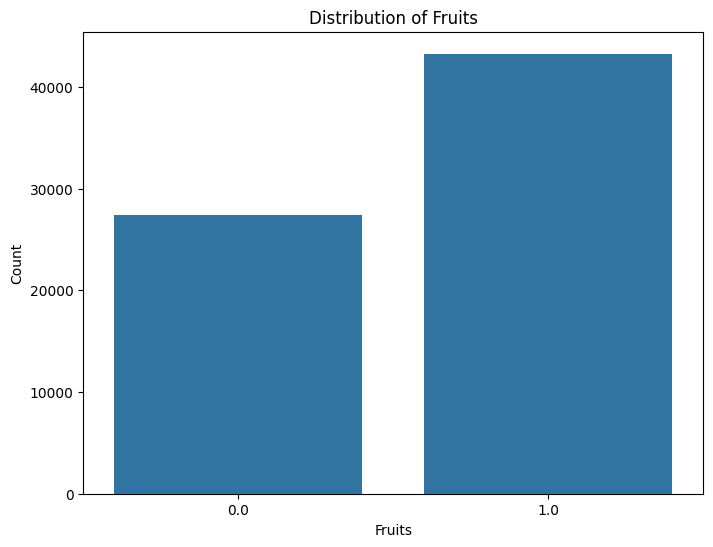

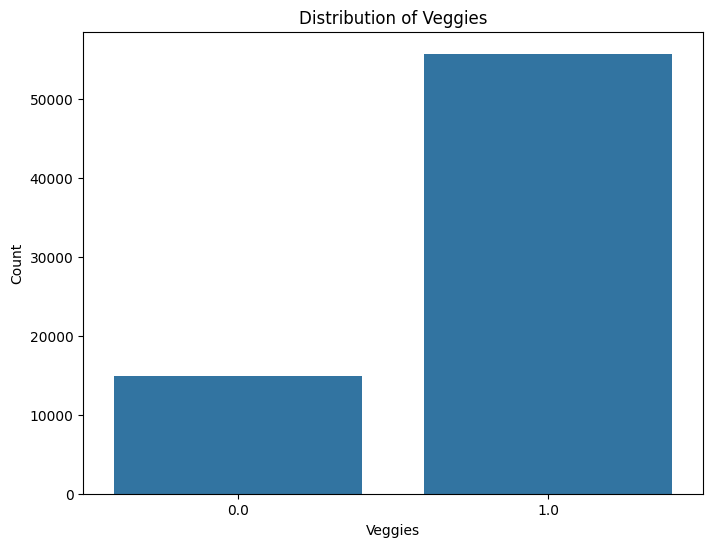

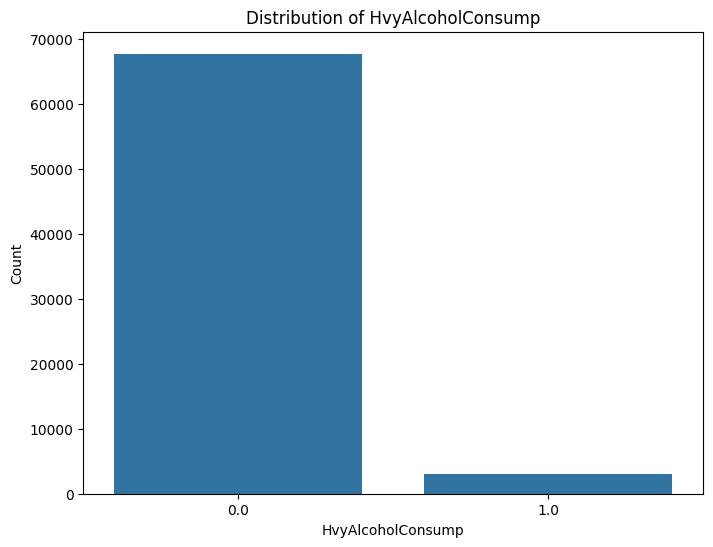

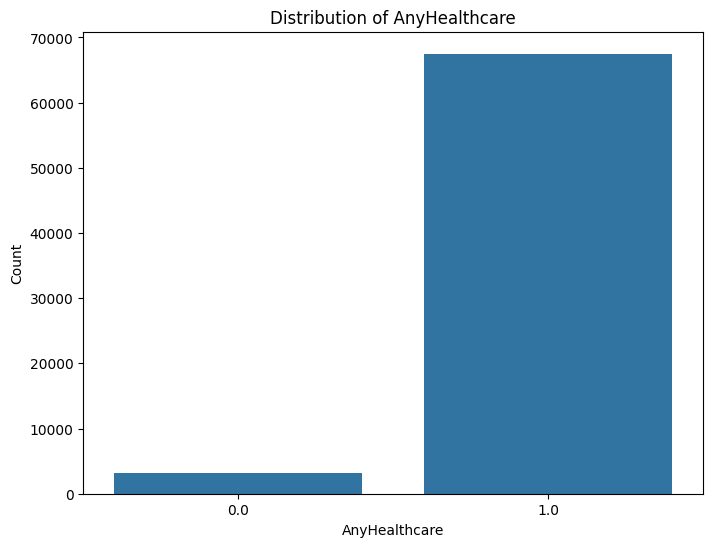

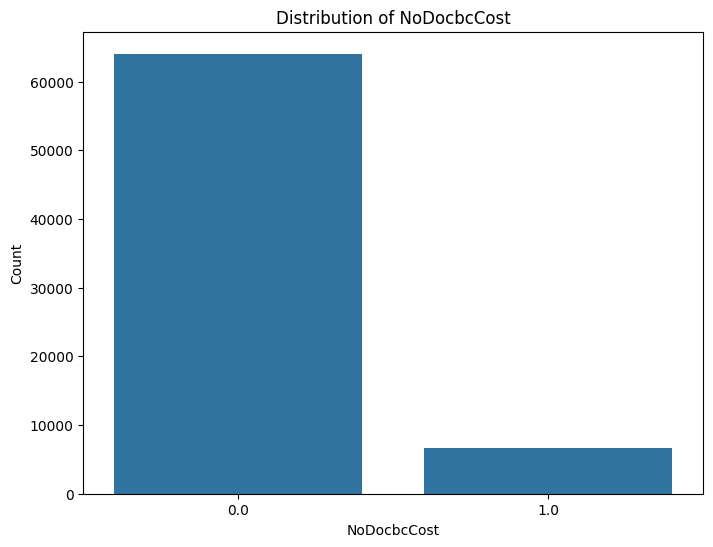

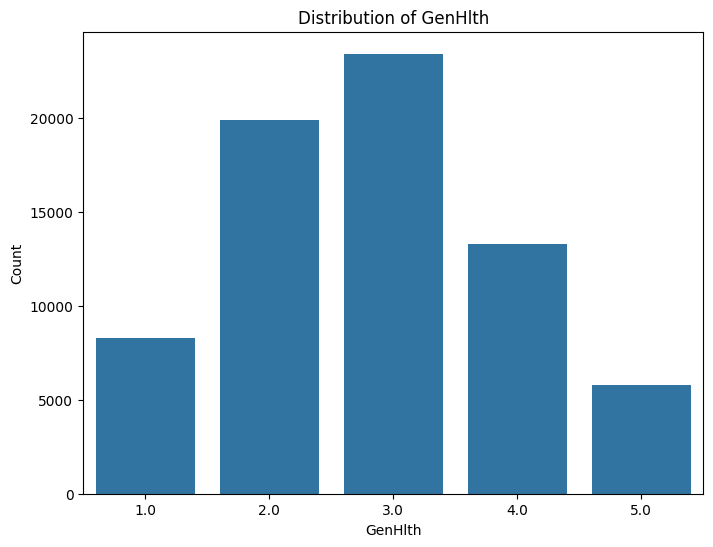

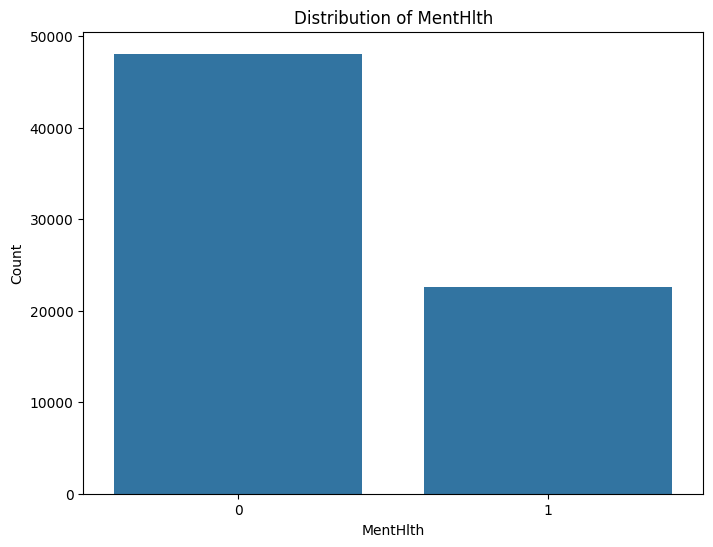

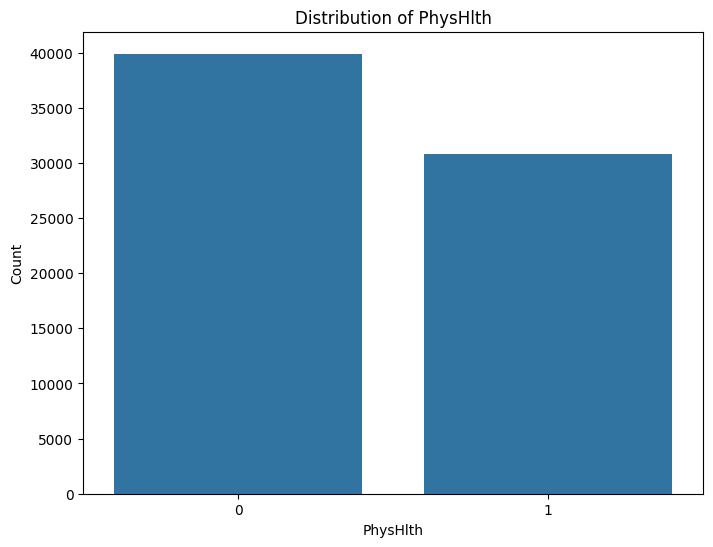

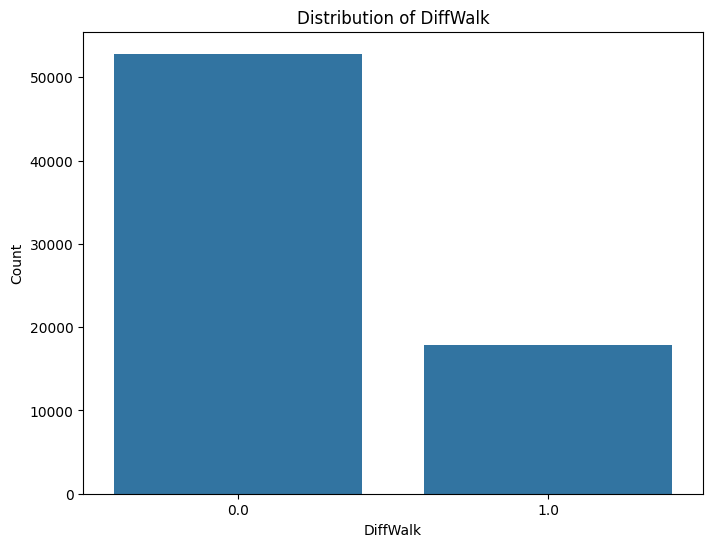

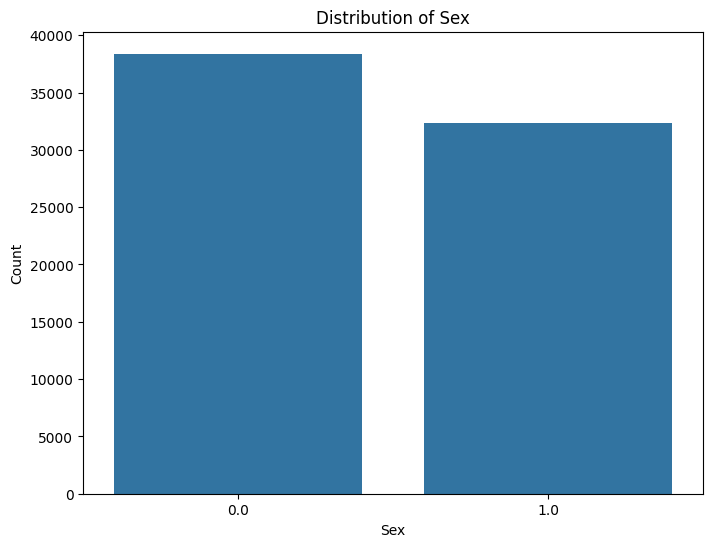

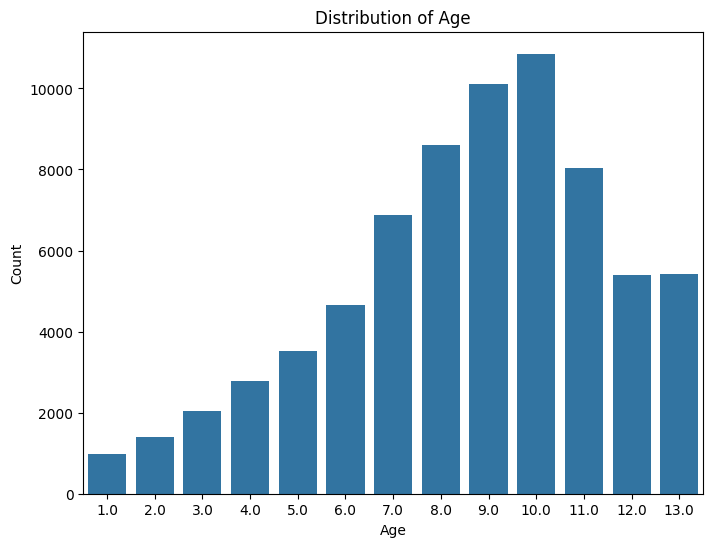

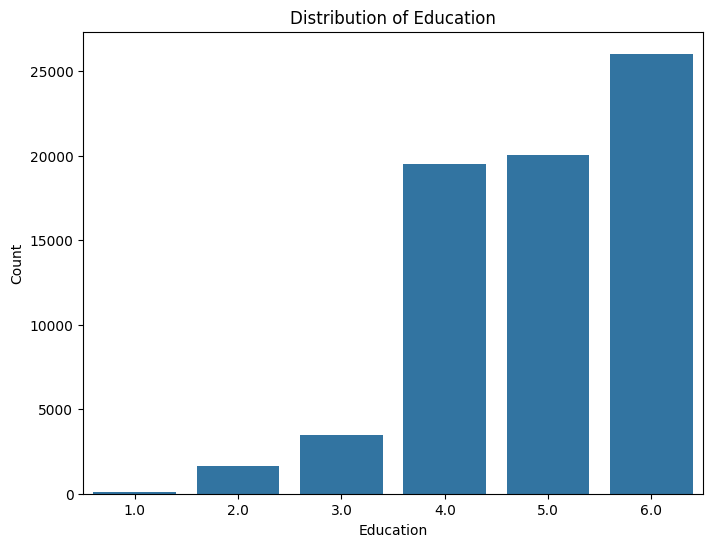

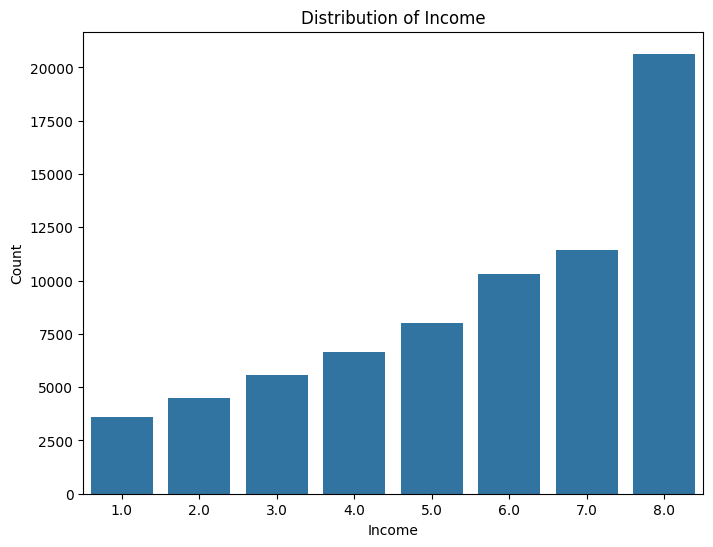

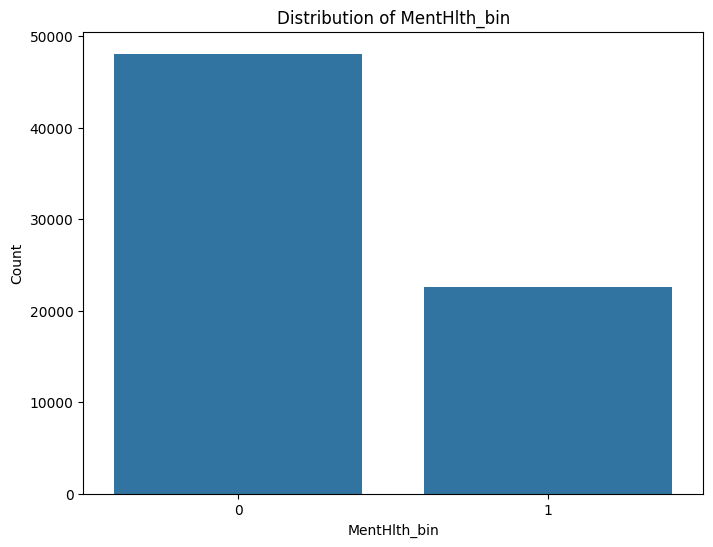

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df_diabetes.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df_diabetes)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


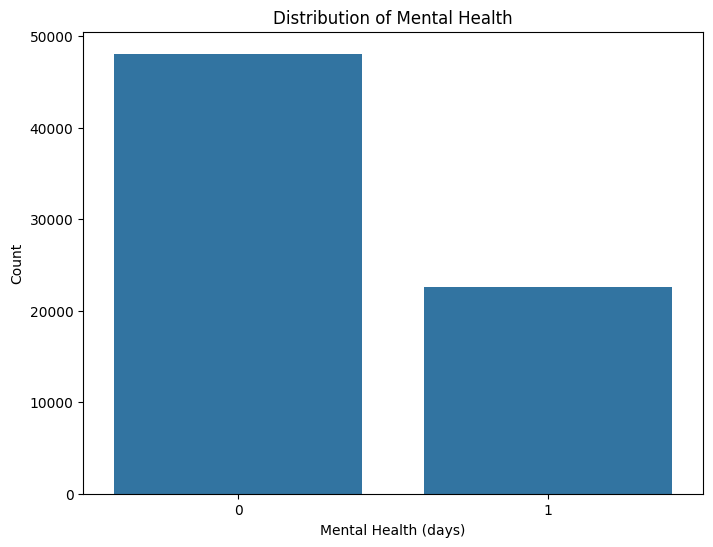

In [104]:

plt.figure(figsize=(8, 6))
sns.countplot(x='MentHlth', data=df_diabetes)
plt.title('Distribution of Mental Health')
plt.xlabel('Mental Health (days)')
plt.ylabel('Count')
plt.show()

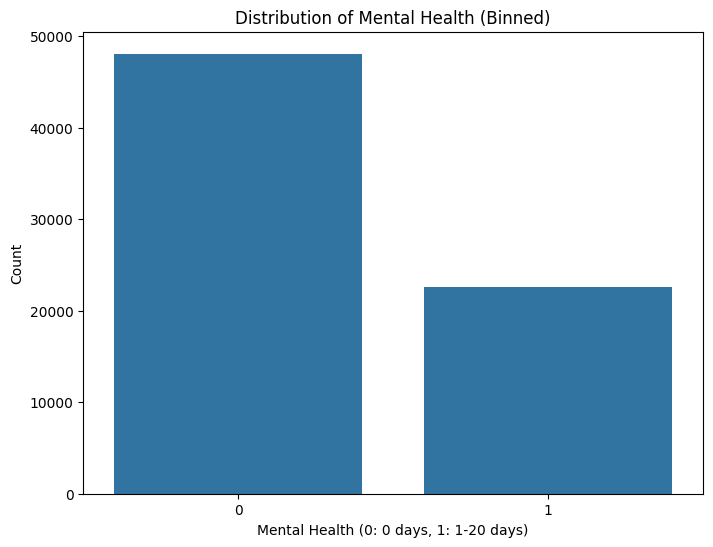

In [105]:
df_diabetes['MentHlth'] = df_diabetes['MentHlth'].apply(lambda x: 0 if x == 0 else 1)

plt.figure(figsize=(8, 6))
sns.countplot(x='MentHlth', data=df_diabetes)
plt.title('Distribution of Mental Health (Binned)')
plt.xlabel('Mental Health (0: 0 days, 1: 1-20 days)')
plt.ylabel('Count')
plt.show()

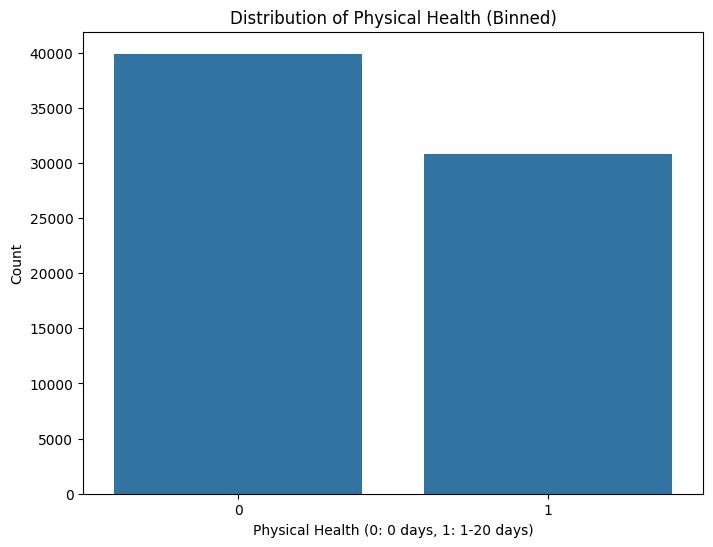

In [107]:

df_diabetes['PhysHlth'] = df_diabetes['PhysHlth'].apply(lambda x: 0 if x == 0 else 1)

plt.figure(figsize=(8, 6))
sns.countplot(x='PhysHlth', data=df_diabetes)
plt.title('Distribution of Physical Health (Binned)')
plt.xlabel('Physical Health (0: 0 days, 1: 1-20 days)')
plt.ylabel('Count')
plt.show()

In [108]:


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = df_diabetes.drop('Diabetes_binary', axis=1)
y = df_diabetes['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.737174651075066

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73     10601
         1.0       0.72      0.78      0.75     10607

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208


Confusion Matrix:
[[7410 3191]
 [2383 8224]]


In [109]:

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7480196152395322

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     10601
         1.0       0.74      0.77      0.75     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208


Logistic Regression Confusion Matrix:
[[7709 2892]
 [2452 8155]]


In [110]:

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn}")

print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nK-Nearest Neighbors Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy: 0.7110524330441342

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.69      0.70     10601
         1.0       0.70      0.73      0.72     10607

    accuracy                           0.71     21208
   macro avg       0.71      0.71      0.71     21208
weighted avg       0.71      0.71      0.71     21208


K-Nearest Neighbors Confusion Matrix:
[[7300 3301]
 [2827 7780]]


In [111]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6603640135797813

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66     10601
         1.0       0.66      0.66      0.66     10607

    accuracy                           0.66     21208
   macro avg       0.66      0.66      0.66     21208
weighted avg       0.66      0.66      0.66     21208


Decision Tree Confusion Matrix:
[[7035 3566]
 [3637 6970]]


In [112]:

from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Support Vector Machine Accuracy: {accuracy_svm}")

print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nSupport Vector Machine Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Support Vector Machine Accuracy: 0.749245567710298

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74     10601
         1.0       0.73      0.80      0.76     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208


Support Vector Machine Confusion Matrix:
[[7444 3157]
 [2161 8446]]
